In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Helper functions

In [2]:
def averaging_loss(loss_progress, n_epoch_to_average):
    return np.mean(loss_progress[:(len(loss_progress)//n_epoch_to_average * n_epoch_to_average)].reshape(-1, n_epoch_to_average), axis=1)

    

### Overview diffusion training logs

In [3]:
import os 
main_dir = './diffusion logs & models/'
all_logs = []
ctr = 0

for sub_dir in os.scandir(main_dir):
    if sub_dir.is_dir():
        for file in os.listdir(main_dir + sub_dir.name):
            if file.endswith('.log') and not file.endswith('checkpoint.log'):
                
                with open(os.path.join(main_dir, sub_dir.name, file)) as f:
                    f = f.readlines()
                
                print(os.path.join(main_dir, sub_dir.name, file))
                
                beta1 = 0.9 # defaults for logs missing these values
                beta1 = 0.999
                eps = 1e-08
                min_loss = 1000
                min_loss_idx = 0
                optimizer = 'Adam'
                batch_size = '10 or 5'

                for idx, line in enumerate(f):
                    if "Decoder model used" in line :
                        if idx < 10:
                            decoder_model = line.split('=')[1].strip()
                        else:
                            break
                    if "Decoder epoch used" in line:
                        decoder_epoch = line.split('=')[1].strip()
                    if "Shapecode epoch used" in line :
                        shapecode_epoch = line.split('=')[1].strip()
                    if "# of shapes used for diffusion" in line :
                        n_shapes = line.split('=')[1].strip()
                    if "Shape indices" in line :
                        shape_indices = line.split('=')[1].strip()
                    if "# of steps for diffusion forward process" in line and idx < 10:
                        forward_process_t = line.split('=')[1].strip()
                    if "Learning rate" in line :
                        lr = line.split('=')[1].strip()
                    if "Beta 1" in line :
                        beta1 = line.split('=')[1].strip()
                    if "Beta 2" in line :
                        beta2 = line.split('=')[1].strip()
                    if "Eps" in line :
                        eps = line.split('=')[1].strip()
                    if "loss" in line:
                        epoch_trained = line.split('-')[2].split('loss')[0].strip()
                        loss = float(line.split('=')[1].strip())
                        if min_loss > loss:
                            min_loss = loss
                            min_loss_idx = line.split('-')[2].split('loss')[0].strip()
                    if "Optimzer" in line:
                        optimizer = line.split('=')[1].strip()
                    if "Batch size" in line:
                        batch_size = line.split('=')[1].strip()
                try:
                    all_logs.append([sub_dir.name, decoder_model, decoder_epoch, shapecode_epoch, 
                                     n_shapes, shape_indices, forward_process_t, lr, beta1, beta2, eps,
                                     optimizer, batch_size, epoch_trained, min_loss, min_loss_idx])
                    ctr += 1
                except Exception as e:
                    print(e)
                    pass

print(f"processed {ctr} diffusion logs")
import numpy as np
import pandas as pd

all_logs = np.array(all_logs)
df = pd.DataFrame(all_logs, columns = ['datetime','decoder_model', 'decoder_epoch', 'shapecode_epoch', 
                                       'n_shapes', 'shape_indices', 'forward_process_t', 'lr', 'beta1', 'beta2', 'eps',
                                       'optimizer', 'batch_size', 'epoch_trained', 'min_loss', 'min_loss_idx'])
df = df.sort_values(by=['datetime'])
df = df.set_index('datetime')
df["remarks"] = ""
df.at['09192022_111056', 'remarks'] = 'so far, loss=batch loss not epoch loss'
df.at['09192022_083111','batch_size']=10
df.at['09262022_122842', 'remarks'] = '6 layers, 1->3->5 skip'
df.at['09272022_040550', 'remarks'] = '8 lyaers, 1->3->5->7 skip'


./diffusion logs & models/09262022_122842/09262022_122842.log
./diffusion logs & models/09172022_135415/09172022_135415.log
./diffusion logs & models/09192022_083111/09192022_083111.log
./diffusion logs & models/09272022_122905/09272022_122905.log
./diffusion logs & models/09192022_095434/09192022_095434.log
./diffusion logs & models/09172022_131851/09172022_131851.log
./diffusion logs & models/09192022_111056/09192022_111056.log
./diffusion logs & models/10062022_011812/10062022_011812.log
./diffusion logs & models/09172022_112612/09172022_112612.log
./diffusion logs & models/09192022_085521/09192022_085521.log
./diffusion logs & models/09172022_153555/09172022_153555.log
./diffusion logs & models/09272022_165500/09272022_165500.log
./diffusion logs & models/10062022_011931/10062022_011931.log
./diffusion logs & models/09172022_114713/09172022_114713.log
./diffusion logs & models/09272022_040550/09272022_040550.log
./diffusion logs & models/09172022_111936/09172022_111936.log
processe

In [4]:
df

,decoder_model,decoder_epoch,shapecode_epoch,n_shapes,shape_indices,forward_process_t,lr,beta1,beta2,eps,optimizer,batch_size,epoch_trained,min_loss,min_loss_idx,remarks
datetime,,,,,,,,,,,,,,,,
09172022_111936,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,0.0001,0.999,0.9,1e-08,Adam,10 or 5,25600,0.009974056854844093,25400,
09172022_112612,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.999,0.9,1e-08,Adam,10 or 5,99900,0.004078746307641268,94300,
09172022_114713,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,10 or 5,187200,0.0012752292677760124,185600,
09172022_131851,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,10 or 5,199900,0.0057657212018966675,197300,
09172022_135415,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,10 or 5,299900,0.003621832700446248,297000,
09172022_153555,09152022_190445,1410,1410,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-06,0.9,0.9,1e-07,Adam,10 or 5,599900,0.0294741652905941,591800,
09192022_083111,09152022_190445,2990,2990,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,10,299900,0.004590251483023167,298800,
09192022_085521,09152022_190445,2990,2990,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,5,299900,0.001210157759487629,256200,
09192022_095434,09152022_190445,3000,3000,10,"[3155, 6209, 3445, 331, 2121, 4188, 3980, 3317...",30000,1e-05,0.9,0.9,1e-07,Adam,5,299900,0.0011554143857210875,251600,


### Plot loss progress

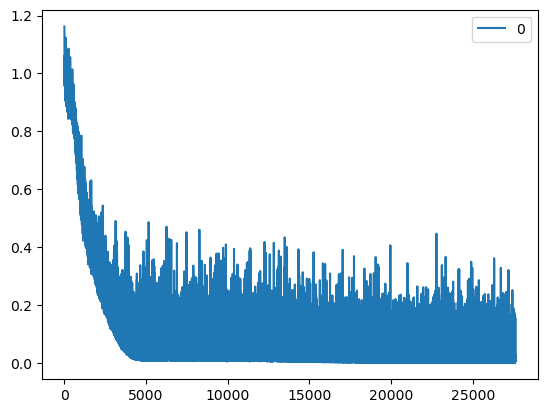

In [5]:
# 10-shape diffusion with 10-shape decoder
df = pd.read_csv(f'./diffusion logs & models/08182022_205351.csv', header=None)
df.plot()
plt.show()

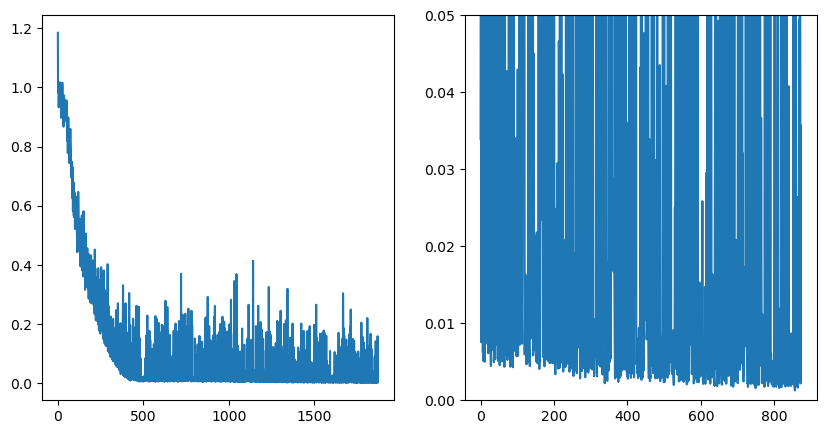

In [6]:
dt = '09172022_114713'
infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(loss_progress)
axs[1].plot(loss_progress[1000:])
axs[1].set_ylim([0, 0.05])

plt.show()


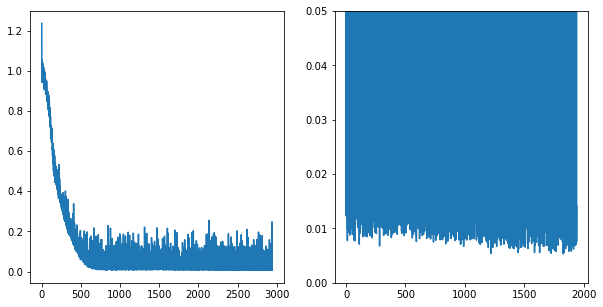

In [81]:
dt = '09192022_083111'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(loss_progress)
axs[1].plot(loss_progress[1000:])
axs[1].set_ylim([0, 0.05])

plt.show()


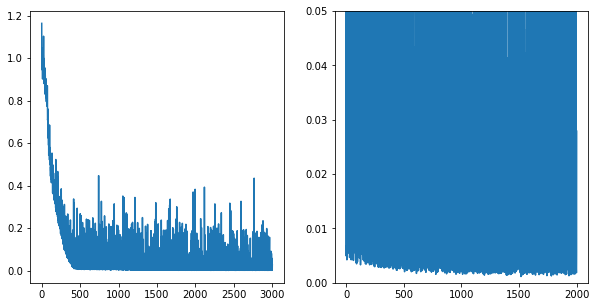

In [118]:
dt = '09192022_095434'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(loss_progress)
axs[1].plot(loss_progress[1000:])
axs[1].set_ylim([0, 0.05])

plt.show()


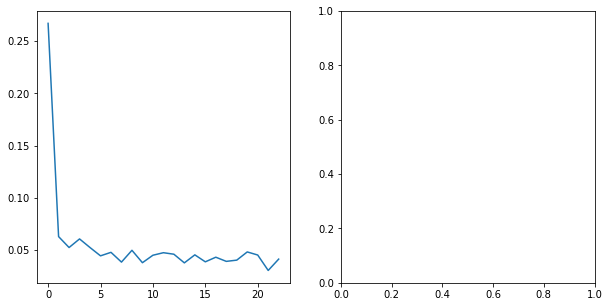

In [182]:
dt = '09192022_111056'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 100))
# axs[1].plot(loss_progress[200:])
# axs[1].set_ylim([0, 0.004])

plt.show()


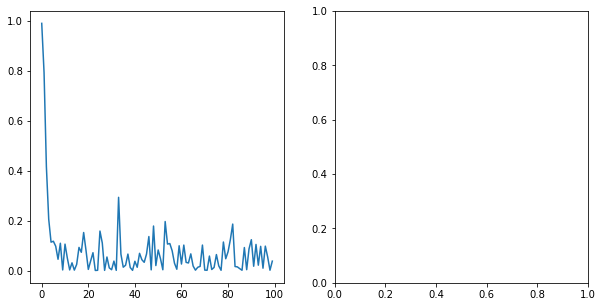

In [223]:
dt = '09262022_122842' 

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 1))
# axs[1].plot(loss_progress)
# axs[1].set_ylim([0, 0.02])

plt.show()


# 1000 shapes, 6 layers

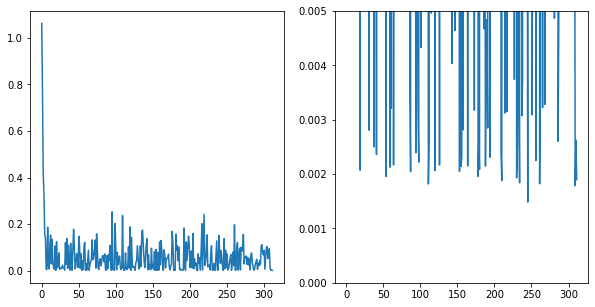

In [246]:
dt = '09272022_040550'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 1))
axs[1].plot(loss_progress)
axs[1].set_ylim([0, 0.005])

plt.show()


# 1000 shapes, 8 layers

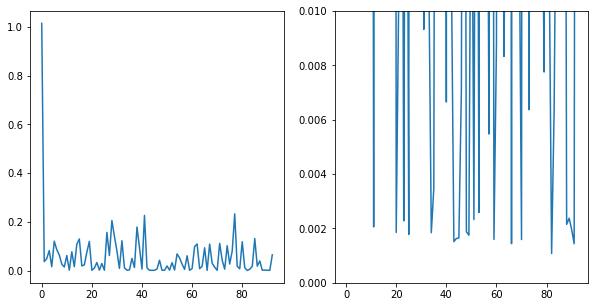

In [10]:
dt = '09272022_165500'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 1))
axs[1].plot(loss_progress)
axs[1].set_ylim([0, 0.01])

plt.show()


# 6778 shapes, 8 layers

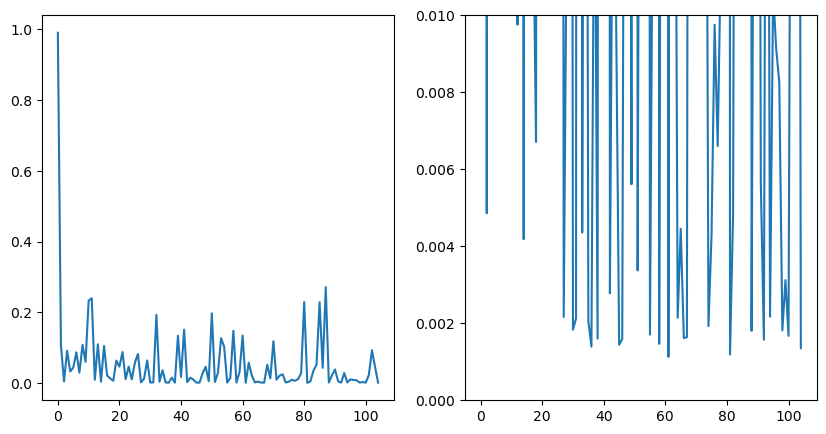

In [5]:
dt = '10062022_011812'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 1))
axs[1].plot(loss_progress)
axs[1].set_ylim([0, 0.01])

plt.show()


# 6278 shapes, 8 layers

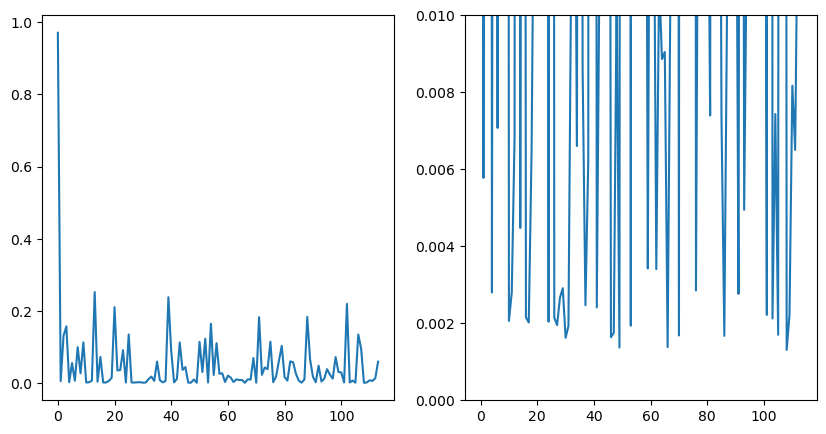

In [7]:
dt = '10062022_011931'

infile = f'./diffusion logs & models/{dt}/{dt}.log'

loss_progress = []

with open(infile) as f:
    f = f.readlines()

for idx, line in enumerate(f):
    if "loss" in line:
        loss = line.split('=')[1].strip()
        loss_progress.append(float(loss))

    if "Decoder model used" in line and idx > 10:
        break

loss_progress = np.array(loss_progress)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(averaging_loss(loss_progress, 1))
axs[1].plot(loss_progress)
axs[1].set_ylim([0, 0.01])

plt.show()


# 5778 shapes, 8 layers

### Test diffusion

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

[[0.34447438 0.84008197]
 [0.75384013 0.90657093]
 [0.20239707 0.5812015 ]
 [0.40573538 0.2647697 ]
 [0.54795706 0.52123325]
 [0.50715385 0.04431798]
 [0.85716635 0.67066035]
 [0.69183885 0.74777514]
 [0.4883415  0.13035667]
 [0.1451083  0.96286344]]


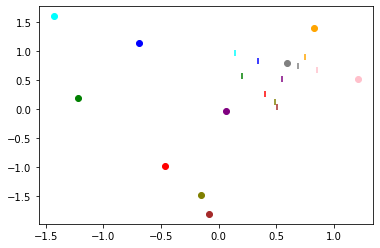

In [ ]:
## test run with 2D datasets
points = np.random.rand(10, 2)
print(points)

for i in range(10):
    plt.scatter(points[i,0], points[i,1], c=colors[i], marker='|')


std = np.std(points)
mean = np.mean(points)
points_normalized = (points-mean)/std

for i in range(10):
    plt.scatter(points_normalized[i,0], points_normalized[i,1], c=colors[i])

